__1.-Explica com funciona l’establiment de la connexió en HDLC i en TCP. Quina és la diferència que hi ha en aquest mecanisme per aquests dos protocols? (1 punt)__

En la següent figura tenim l'establiment de la connexió en HDLC:
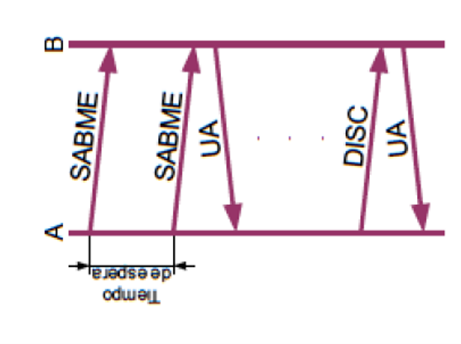

Com es pot veure, el node que vol iniciar la comunicació envia una solicitud de connexió indicant el format en el qual vol que aquesta funcioni. Si l'altre node està d'acord, envia un ACK no numerat i la comunicació s'estableix. Tenim per tant dos passos.

En el cas de TCP, l'establiment de la connexió es fa en tres passos, tal com indica la següent imatge:
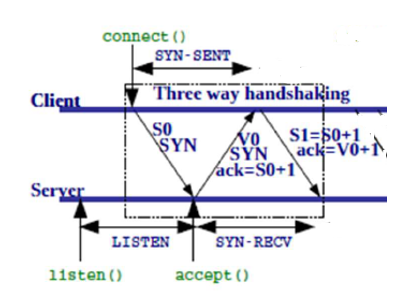
En TCP hi ha un node que incia la comunicació enviant el senyal de SYN, el node destí respon amb un ACK al senyal de SYN i a més, envia el seu senyal de SYN. El node origen ha de confirmar aquest SYN per donar per iniciat el mecanisme. Veiem doncs que implica un triple handchek. Tres passos en lloc de dos com es fa a HDLC.

__2.- Donada la IP 192.168.1.0/24 expliqueu com es podria fer una subxarxa de 100 usuaris, una de 50 i la resta de 12 usuaris. Quins són els rangs de IPs per cada subxarxa? Quina màscara tenen les diferents subxarxes? Quantes subxarxes de 12 usuaris es poden crear? (2 punts)__

* 192.168.1.0/25 ==> Implica $2^7 - 2 = 126$ usuaris. La primera IP de usuari serà la 192.168.1.1/25 i la darrera serà 192.168.1.126/25

Ara ens queda la IP 192.168.1.128/25 ==> Agafem un bit més per la màscara, això donarà dos noves subxares: 192.168.1.128/26 i 192.168.1.192/26

La primera em serveix per crear la segona subxarsa:
* 192.168.1.128/26 ==> Implica $2^6 -2 = 62$ usuaris. La primera IP serà la 192.168.1.129/26 i la darrera serà la 192.168.1.190/26

Finalment ens demanen crear 4 subxarxes de 12 bits. Partim de la subxarxa 192.168.1.190/26. Tindrem les següents subxarxes:
* 192.168.1."11 00 0000" = 192.168.1.192/28
* 192.168.1."11 01 0000" = 192.168.1.208/28
* 192.168.1."11 10 0000" = 192.168.1.224/28
* 192.168.1."11 11 0000" = 192.168.1.240/28

__3.- Explica l’estructura de les adreces de IPv6. Es poden crear subxarxes? Quin és el camp que identifica l’usuari o interfície final? (1 punt)__



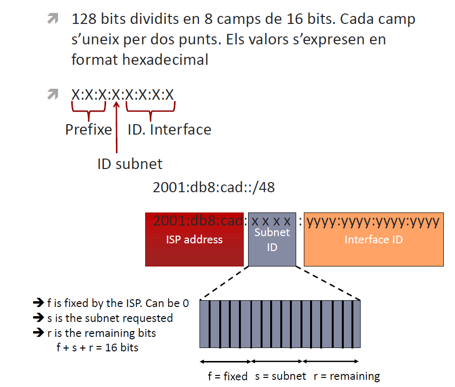


A partir dels 16 bits del camp de Subnet ID podem crear subxarxes. El camp que identifica la interficie de usuari és el darrer camp de 64 bits, el de color taronja.

__4.- Tenim un datagrama IP que té una capçalera de 20Bytes i un payload de 560 Bytes. La mida màxima de datagrames IP que poden circular per la xarxa és de 250 Bytes. Expliqueu els passos que cal fer per fragmentar aquest datagrama. (2 punts)__

In [5]:
Mida_Maxima = 250 # Bytes
ip_ov = 20
Mida_maxima_dades = 250 - ip_ov # Bytes
print(Mida_maxima_dades)

230


In [9]:
# és divisible per 8?? ens assegurem treballant amb enters
mida = Mida_maxima_dades//8
print(mida)
print("per tant la mida del datagrama dividit serà", mida*8 +ip_ov, "Bytes")

28
per tant la mida del datagrama dividit serà 244 Bytes


In [14]:
mida_original = 560 - ip_ov
num_datagrames = mida_original // (mida*8) + 1 
num_datagrames, "ja que el resultat no es enter = ", mida_original / (mida*8)

(3, 'ja que el resultat no es enter = ', 2.4107142857142856)

Per tant tindrem:
* 1er datagrama amb bit de More = 1, desplaçament = 0 i mida 244 Bytes ( 224 + 20)
* 2on datagrama amb bit de More = 1, desplaçament = 28 i mida 244 Bytes (224 + 20)
* 3er datagrama amb bit de More = 0, desplaçament = 56 i mida 132 Bytes ( 112 + 20)


In [19]:
print("el conjunt de dades transmesses és: ", 224+224+92)
print("el conjunt de dades inicials era 560 B - 20 de capçalera = 540")

el conjunt de dades transmesses és:  540
el conjunt de dades inicials era 560 B - 20 de capçalera = 540


__5.- Explica el camp de control de les trames d’informació de HDLC. Donada la següent imatge:__
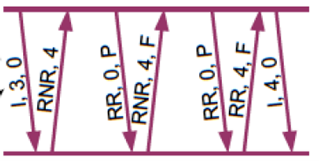
__Explica el que està passant. (1 punt)__


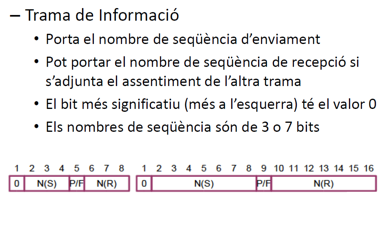
La primera trama ens indica que esta enviant la trama 3 i que espera la 0. El secundari respon que ACK a la trama 3, que espera la 4 però que no li envii encara. El origen indica amb RR 0,P que ACK i que si ja li pot enviar la següent. El destí indica que reb correctament la pregunta, pero que encara no (poll - final). finalment en el següent poll, el destí respon amb ACK i que espera ja la trama 4. Tot seguit, el origen envia la trama 4 indicant que espera la trama de dades 0.

__6.- Dos ordinadors estan separats una distància de 1000m i units per un cable de coure UTP cat 6 a una velocitat de 10Mbps. Si implementem un protocol RQ inactiva, determina la mida necessària de les trames perquè l’eficiència sigui del 70%. Raona el resultat. Considera que la mida de les trames ACK és de 20 Bytes i el temps de processat és de 1 µs. Poden ser menyspreables aquests valors? Raona la resposta. Fes el mateix considerant una probabilitat d’error del 1%. Considera que la velocitat de propagació del cable és de 2E8 m/s. (2 punts)__

In [2]:
import sympy as sp
sp.init_printing()

sp.var("T_tx")
sp.var("T_prop")
sp.var("T_proc")
sp.var("T_ack")
Eficiencia = T_tx/(T_tx + 2*T_prop + 2*T_proc + T_ack)
print(Eficiencia)
distancia = 1000
v_tx = 10E6
U = 0.7

T_tx/(T_ack + 2*T_proc + 2*T_prop + T_tx)


In [3]:
a = (T_prop + T_proc + T_ack/2)/T_tx
b = T_prop/T_tx
print("sense aproximar tenim: ",a)
print("aproximant tproc i tack com menyspreables tenim", b)

sense aproximar tenim:  (T_ack/2 + T_proc + T_prop)/T_tx
aproximant tproc i tack com menyspreables tenim T_prop/T_tx


In [4]:
# solucionem el problema...
sp.var("L")
c = 2E8
s = distancia/c
print(s)
E = Eficiencia.subs(T_prop, s).subs(T_proc, 1E-6).subs(T_ack, 20*8/v_tx).subs(T_tx, L/v_tx).evalf()
print(E)
f = E - U
Ltrama = sp.solve(f, L)

5e-06
1.0e-7*L/(1.0e-7*L + 2.8e-5)


In [5]:
import numpy as np

print(np.ceil(Ltrama[0]), "bits")

print("Aquesta és la mida necesària per poder tenir una eficiència del 70%.")

654 bits
Aquesta és la mida necesària per poder tenir una eficiència del 70%.


In [6]:
print("el valor de a total és a = ", a.subs(T_prop, s).subs(T_proc, 1E-6).subs(T_ack, 20*8/v_tx).subs(T_tx, Ltrama[0]/v_tx).evalf())

el valor de a total és a =  0.214285714285714


In [7]:
print("el valor de a sense considerar el temps de processat i el temps de ack serà: ", 
      b.subs(T_prop, s).subs(T_tx, Ltrama[0]/v_tx).evalf())

bnum = b.subs(T_prop, s).subs(T_tx, Ltrama[0]/v_tx).evalf()

print("El valor de l'Eficiència serà: U = ", 1/(1+2*bnum) )

el valor de a sense considerar el temps de processat i el temps de ack serà:  0.0765306122448979
El valor de l'Eficiència serà: U =  0.867256637168141


Sembla clar que no podem descartar els valors del temps de processat i de ack, ja que si no els considerem passem de una Eficiència igual a 0.7 a una igual a 0.87

__7.- Donada la següent imatge, indica quins són els camps associats al control de flux en TCP. Raona la resposta (1 punt)__

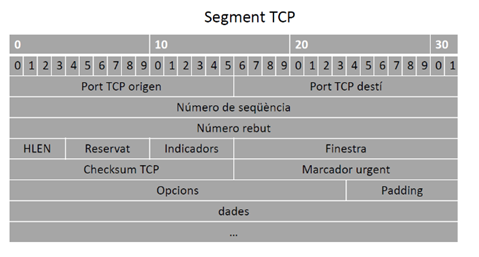
Tal i com s'observa a la imatge, els camps de la capçalera TCP associats al control de flux són:
* El número de seqüència associat al num. de paquet que estem enviant.
* El número rebut, associat al següent paquet que esperem del node remot
* La finestra de recepció
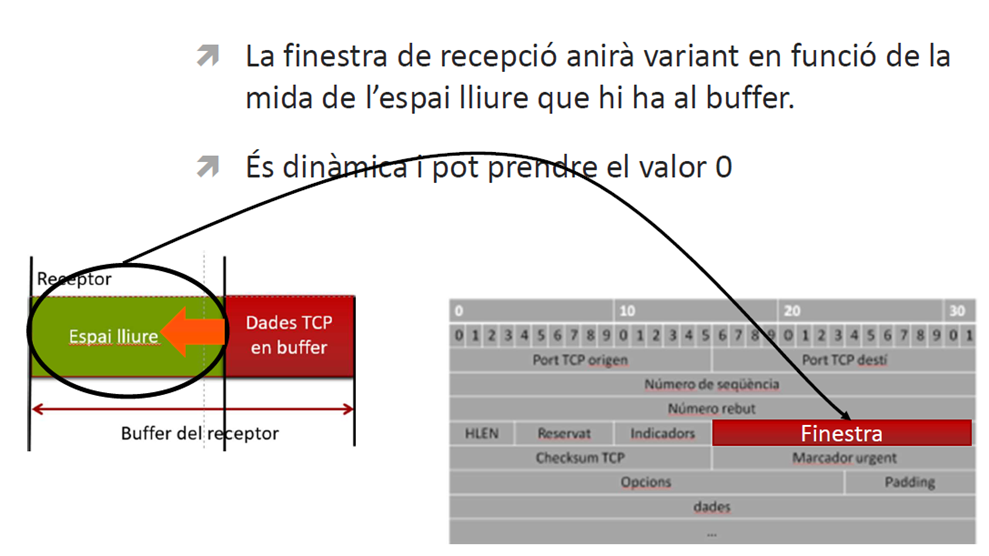

In [1]:
1000/2e8

5e-06

In [8]:
f_o = (L/10E6)/((L/10E6)+2*5E-6) - 0.7
sp.solve(f_o, L)

In [1]:
230/8

28.75

In [2]:
28*8

224